In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Split data

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("./Age processing/train_AgeFilled.csv")
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Mrs,Miss,Master,Dr,Other
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0,0.0,0.0,0.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,0.0,0.0,0.0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
def data_preproessing(data):
    data.drop(labels=["Unnamed: 0"],axis=1)
    trimmed_data = data.drop(labels=["Name","Ticket","Cabin","PassengerId","Unnamed: 0"],axis=1)
    return trimmed_data

In [5]:
trimmed_data = data_preproessing(data)
train_data,test_data = train_test_split(trimmed_data,test_size=0.3)

In [6]:
train_y = np.array(train_data["Survived"])
test_y = np.array(test_data["Survived"])

In [7]:
train_X = pd.get_dummies(train_data.drop(labels=["Survived"],axis=1))
test_X = pd.get_dummies(test_data.drop(labels=["Survived"],axis=1))

In [8]:
train_X.head()

,Pclass,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,Master,Dr,Other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
299,1,50.0,0,1,247.5208,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0
354,3,27.0,0,0,7.2250,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0
698,1,49.0,1,1,110.8833,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0
649,3,23.0,0,0,7.5500,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,1
112,3,22.0,0,0,8.0500,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1


### Scale data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
### Scale the data
def scale_data(data):
    age_array = np.array(data)[:,np.newaxis]
    age_scaler = StandardScaler().fit(age_array)
    scaled_age = age_scaler.transform(age_array)[:,0]
    return scaled_age

In [11]:
train_X["Age"] = scale_data(train_X["Age"])
train_X["Fare"] = scale_data(train_X["Fare"])

In [12]:
test_X["Age"] = scale_data(test_X["Age"])
test_X["Fare"] = scale_data(test_X["Fare"])

In [13]:
train_X.head()

,Pclass,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,Master,Dr,Other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
299,1,1.522073,0,1,4.158516,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0
354,3,-0.183749,0,0,-0.487244,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0
698,1,1.447907,1,1,1.516834,1.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0
649,3,-0.480413,0,0,-0.480961,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,1
112,3,-0.554579,0,0,-0.471294,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1


In [14]:
test_X.head()

,Pclass,Age,SibSp,Parch,Fare,Mr,Mrs,Miss,Master,Dr,Other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
202,3,0.307173,0,0,-0.565941,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
636,3,0.163169,0,0,-0.533832,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
641,1,-0.412850,0,0,0.845053,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0
245,1,1.027196,2,0,1.310110,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,1,0
739,3,-0.052838,0,0,-0.534488,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1


### Build models

In [15]:
#Since this is a classification task, we use logistic regression, FDA, naive bayes, classification tree, SVM and neural network as our models

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

### Draw learning curves

In [16]:
from sklearn.model_selection import learning_curve

In [17]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), verbose=0):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Logistic Regression

In [18]:
LR = LogisticRegression()
LR.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

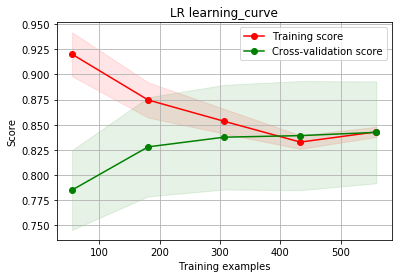

In [19]:
plot_learning_curve(LR,title="LR learning_curve",X=train_X,y=train_y,cv=10)

In [22]:
LR_CV_score_train = cross_val_score(LR,train_X,train_y,cv=10)
LR_CV_score_test = cross_val_score(LR,test_X,test_y,cv=10)

In [24]:
LR_predict_y = LR.predict(test_X)

In [25]:
LR_error_rate = np.sum((abs(test_y-LR_predict_y)))/LR_predict_y.shape[0]

### Linear Discriminant Analysis

In [26]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(train_X,train_y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

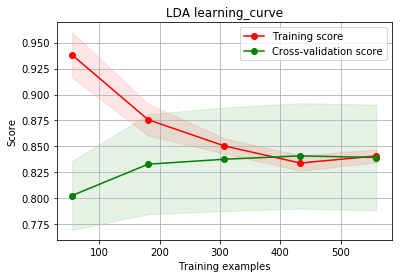

In [27]:
plot_learning_curve(LDA,title="LDA learning_curve",X=train_X,y=train_y,cv=10)

In [28]:
LDA_CV_score_train = cross_val_score(LDA,train_X,train_y,cv=10)
LDA_CV_score_test = cross_val_score(LDA,test_X,test_y,cv=10)

In [29]:
LDA_predict_y = LDA.predict(test_X)

In [30]:
LDA_error_rate = np.sum((abs(test_y-LDA_predict_y)))/LDA_predict_y.shape[0]

### Naive Bayes

In [31]:
NB = GaussianNB()
NB.fit(train_X,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

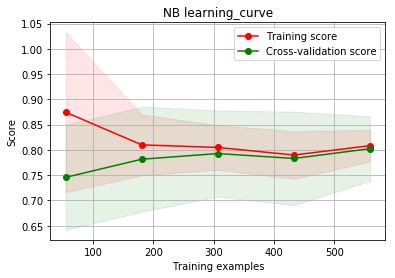

In [32]:
plot_learning_curve(NB,title="NB learning_curve",X=train_X,y=train_y,cv=10)

In [33]:
NB_CV_score_train = cross_val_score(NB,train_X,train_y,cv=10)
NB_CV_score_test = cross_val_score(NB,test_X,test_y,cv=10)

In [34]:
NB_predict_y = NB.predict(test_X)

In [35]:
NB_error_rate = np.sum((abs(test_y-NB_predict_y)))/NB_predict_y.shape[0]

### Decition Tree Classifier

In [36]:
DTC = DecisionTreeClassifier()
DTC.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

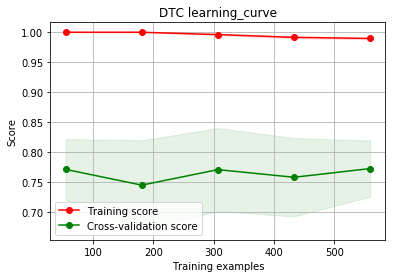

In [37]:
plot_learning_curve(DTC,title="DTC learning_curve",X=train_X,y=train_y,cv=10)

In [38]:
DTC_CV_score_train = cross_val_score(DTC,train_X,train_y,cv=10)
DTC_CV_score_test = cross_val_score(DTC,test_X,test_y,cv=10)

In [39]:
DTC_predict_y = DTC.predict(test_X)

In [40]:
DTC_error_rate = np.sum((abs(test_y-DTC_predict_y)))/DTC_predict_y.shape[0]

### Support Vector Classifier

In [41]:
SVM_classfier = SVC()
SVM_classfier.fit(train_X,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

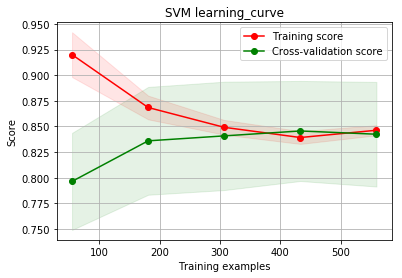

In [42]:
plot_learning_curve(SVM_classfier,title="SVM learning_curve",X=train_X,y=train_y,cv=10)

In [43]:
SVM_CV_score_train = cross_val_score(SVM_classfier,train_X,train_y,cv=10)
SVM_CV_score_test = cross_val_score(SVM_classfier,test_X,test_y,cv=10)

In [44]:
SVM_predict_y = SVM_classfier.predict(test_X)

In [45]:
SVM_error_rate = np.sum((abs(test_y-SVM_predict_y)))/SVM_predict_y.shape[0]

### Neural Network

In [46]:
NN = MLPClassifier(hidden_layer_sizes=(64))
NN.fit(train_X,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=64, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

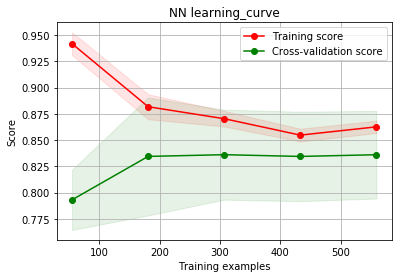

In [47]:
plot_learning_curve(NN,title="NN learning_curve",X=train_X,y=train_y,cv=10)

In [48]:
NN_CV_score_train = cross_val_score(NN,train_X,train_y,cv=10)
NN_CV_score_test = cross_val_score(NN,test_X,test_y,cv=10)

In [49]:
NN_predict_y = NN.predict(test_X)

In [50]:
NN_error_rate = np.sum((abs(test_y-NN_predict_y)))/NN_predict_y.shape[0]

### Xgboost

In [63]:
XGBC = XGBClassifier(
silent=0 ,#设置成1则没有运行信息输出，最好是设置为0.是否在运行升级时打印消息。
#nthread=4,# cpu 线程数 默认最大
learning_rate= 0.001, # 如同学习率
min_child_weight=1, 
# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。
max_depth=4, # 构建树的深度，越大越容易过拟合
gamma=0,  # 树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子。
subsample=1, # 随机采样训练样本 训练实例的子采样比
max_delta_step=0,#最大增量步长，我们允许每个树的权重估计。
colsample_bytree=1, # 生成树时进行的列采样 
reg_lambda=20,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
#reg_alpha=0, # L1 正则项参数
#scale_pos_weight=1, #如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛。平衡正负权重
#objective= 'multi:softmax', #多分类的问题 指定学习任务和相应的学习目标
#num_class=10, # 类别数，多分类与 multisoftmax 并用
n_estimators=100, #树的个数
seed=1000 #随机种子
#eval_metric= 'auc'
)
XGBC.fit(train_X,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       learning_rate=0.001, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=20, scale_pos_weight=1, seed=1000, silent=0,
       subsample=1, verbosity=1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

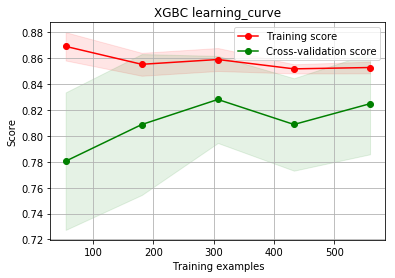

In [64]:
plot_learning_curve(XGBC,title="XGBC learning_curve",X=train_X,y=train_y,cv=10)

In [65]:
XGBC_CV_score_train = cross_val_score(XGBC,train_X,train_y,cv=10)
XGBC_CV_score_test = cross_val_score(XGBC,test_X,test_y,cv=10)

In [66]:
XGBC_predict_y = XGBC.predict(test_X)

In [67]:
XGBC_error_rate = np.sum((abs(test_y-XGBC_predict_y)))/XGBC_predict_y.shape[0]

### Model Comparsion

Model names:  ['LR', 'LDA', 'GaussianNB', 'DTC', 'SVM', 'NN', 'XGBC']
Model errors:  [0.20522388059701493, 0.19776119402985073, 0.23507462686567165, 0.2835820895522388, 0.19029850746268656, 0.20149253731343283, 0.208955223880597]


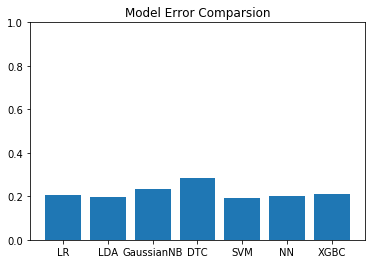

In [68]:
def draw_comparison(model_names,model_errors,title="Model Error Comparsion",y_range=(0,1)):
    print("Model names: ",model_names)
    print("Model errors: ",model_errors)
    plt.bar(model_names,model_errors)
    plt.ylim(y_range)
    plt.title(title)

model_names = ["LR","LDA","GaussianNB","DTC","SVM","NN","XGBC"]
model_errors = [LR_error_rate,LDA_error_rate,NB_error_rate,DTC_error_rate,SVM_error_rate,NN_error_rate,XGBC_error_rate]

draw_comparison(model_names,model_errors)

### Cross Validation

In [69]:
CV_meanscore_list = [LR_CV_score_test.mean(),LDA_CV_score_test.mean(),NB_CV_score_test.mean(),DTC_CV_score_test.mean(),SVM_CV_score_test.mean(),NN_CV_score_test.mean(),XGBC_CV_score_test.mean()]

Model names:  ['LR', 'LDA', 'GaussianNB', 'DTC', 'SVM', 'NN', 'XGBC']
Model errors:  [0.8095441595441596, 0.7984330484330485, 0.7612535612535613, 0.7464387464387464, 0.8021367521367522, 0.8133903133903134, 0.7650997150997151]


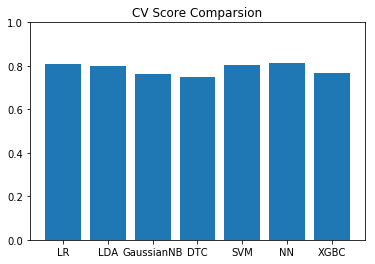

In [70]:
draw_comparison(model_names,CV_meanscore_list,title="CV Score Comparsion")

### Submission

In [ ]:
submit_data = pd.read_csv("./Age processing/test_AgeFilled.csv")

In [ ]:
submit_data.head()

In [ ]:
trimmed_submit_data = submit_data.drop(labels=["Name","Ticket","Cabin","PassengerId","Unnamed: 0"],axis=1)

In [ ]:
trimmed_submit_data = pd.get_dummies(trimmed_submit_data)

In [ ]:
trimmed_submit_data["Age"] = scale_data(trimmed_submit_data["Age"])
trimmed_submit_data["Fare"] = scale_data(trimmed_submit_data["Fare"])

In [ ]:
submit_X = trimmed_submit_data
submit_X = pd.get_dummies(submit_X)
submit_X.head()

In [ ]:
submit_X.info()

## Who the fuck didn't pay his fare 😊😊

In [ ]:
submit_X = submit_X.fillna(32.204208)

In [ ]:
submit_X.info()

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
model_weights = normalizer.fit_transform(np.array(CV_meanscore_list)[np.newaxis,:])
model_weights = model_weights[0]

def combine_predict(submit_X,weights):
    LR_pred = LR.predict(submit_X)*weights[0]
    LDA_pred = LDA.predict(submit_X)*weights[1]
    GNB_pred = NB.predict(submit_X)*weights[2]
    DTC_pred = DTC.predict(submit_X)*weights[3]
    SVM_pred = SVM_classfier.predict(submit_X)*weights[4]
    NN_pred = NN.predict(submit_X)*weights[5]
    result = LR_pred+LDA_pred+GNB_pred+DTC_pred+SVM_pred+NN_pred
    return result

raw_result = combine_predict(submit_X,model_weights)

In [ ]:
result = []

for i in list(raw_result):
    if i > 0.6:
        result.append(1)
    else:
        result.append(0)


In [ ]:
submit_result = np.array(result)

In [ ]:
survive = pd.DataFrame(np.array(submit_result,dtype="int"),columns=["Survived"])

In [ ]:
submit = pd.concat([submit_data["PassengerId"],survive],axis=1)

In [ ]:
submit.head()

In [ ]:
submit.to_csv("Submission.csv",index=False)